In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
#%matplotlib widget
import helpFunctions

In [2]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}  
</style>

# Salami

## 3

In [3]:
def f(x, mu):
    return (1/(6.7*np.sqrt(2*np.pi))*np.exp((-1/2)*(1/(6.7**2)*np.power(x-mu,2))))

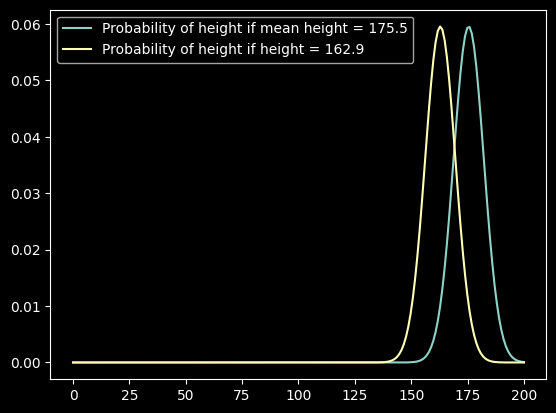

In [4]:
x = np.linspace(0,200,200)


plt.plot(x,f(x,175.5))
plt.plot(x,f(x,162.9))
plt.legend(["Probability of height if mean height = 175.5", "Probability of height if height = 162.9"])

In [5]:
x[f(x,175.5) / f(x,162.9) >= 1]

array([169.84924623, 170.85427136, 171.85929648, 172.86432161,
       173.86934673, 174.87437186, 175.87939698, 176.88442211,
       177.88944724, 178.89447236, 179.89949749, 180.90452261,
       181.90954774, 182.91457286, 183.91959799, 184.92462312,
       185.92964824, 186.93467337, 187.93969849, 188.94472362,
       189.94974874, 190.95477387, 191.95979899, 192.96482412,
       193.96984925, 194.97487437, 195.9798995 , 196.98492462,
       197.98994975, 198.99497487, 200.        ])

## 5

In [6]:
def f(x1, x2):
    return (1/(2*np.pi))*(1/(2*3))*np.exp(-(1/2)*((1/4)*np.power(x1,2)+(1/9)*np.power(x2-1,2)))

In [7]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

X1, X2 = np.meshgrid(x1,x2)

Z = f(X1, X2)

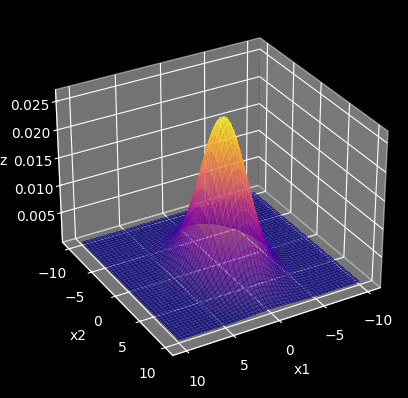

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
# rotation
ax.view_init(30, 60)

## 6

In [9]:
rho = 2/3

def g(x1, x2):
    return (1/(2*np.pi))*(1/6)*(1/(np.sqrt(1-rho**2))*np.exp(   (-1/2)*(1/(1-rho**2))*(     (1/4)*x1**2 - 2*rho*(1/6)*x1*(x2-1)     + (1/9)*(x2-1)**2   )        ))

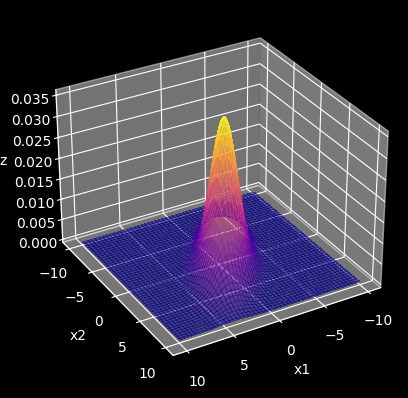

In [10]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
X1, X2 = np.meshgrid(x1,x2)

Z = g(X1, X2)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
# rotation
ax.view_init(30, 60)

## Test

In [19]:

img_path = "./data/multispectral_day01.mat"
annotation_path = "./data/annotation_day01.png"
data, anno = helpFunctions.loadMulti(img_path, annotation_path)

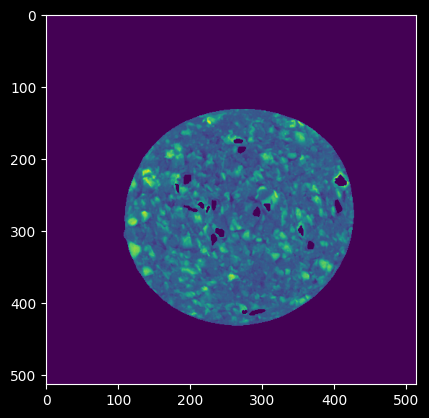

In [20]:
plt.imshow(data[:,:, 0]*anno[:,:,0])

## Tanker
I den første opgave vil jeg gerne prøve at klassificere efter første bånd.
Nedenfor kan man klart se en forskel på kød og fedt.



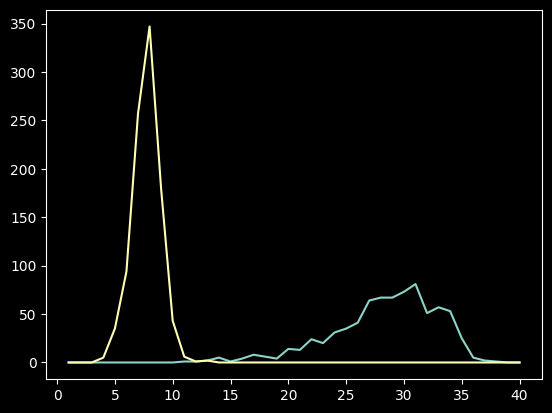

array([[  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   5.],
       [  0.,  35.],
       [  0.,  94.],
       [  0., 257.],
       [  0., 347.],
       [  0., 179.],
       [  0.,  43.],
       [  1.,   6.],
       [  1.,   1.],
       [  2.,   2.],
       [  5.,   0.],
       [  1.,   0.],
       [  4.,   0.],
       [  8.,   0.],
       [  6.,   0.],
       [  4.,   0.],
       [ 14.,   0.],
       [ 13.,   0.],
       [ 24.,   0.],
       [ 20.,   0.],
       [ 31.,   0.],
       [ 35.,   0.],
       [ 41.,   0.],
       [ 64.,   0.],
       [ 67.,   0.],
       [ 67.,   0.],
       [ 73.,   0.],
       [ 81.,   0.],
       [ 51.,   0.],
       [ 57.,   0.],
       [ 53.,   0.],
       [ 25.,   0.],
       [  5.,   0.],
       [  2.,   0.],
       [  1.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,

In [77]:
helpFunctions.showHistograms(data, anno[:,:,1:3], 1,2)

In [178]:
fatPix[:,0:2]

array([[35, 27],
       [34, 27],
       [34, 26],
       ...,
       [33, 27],
       [32, 26],
       [33, 27]], dtype=uint8)

In [219]:
[fatPix, fatR, fatC] = helpFunctions.getPix(data[:,:,:], anno[:,:,1])
[meatPix, meatR, meatC] = helpFunctions.getPix(data[:,:,:], anno[:,:,2])

# C1 = np.cov(fatPix[:,1], fatPix[:,2])
# C2 = np.cov(meatPix[:,1], meatPix[:,2])

# Sigma = 1 / ((fatPix.shape[0] - 1) + (meatPix.shape[0] - 1))*np.sum([(fatPix.shape[0] - 1)*C1, (meatPix.shape[0] - 1)*C2], axis=0)

ran = range(0,1)


cov_fat = np.cov(fatPix[:,ran].T)
cov_meat = np.cov(meatPix[:,ran].T)

Sigma = 1 / ((fatPix.shape[0] - 1) + (meatPix.shape[0] - 1))*np.sum([(fatPix.shape[0] - 1)*cov_fat, (meatPix.shape[0] - 1)*cov_meat], axis=0)
Sigma


11.197274858801933

In [220]:
mu = np.mean(meatPix)
n = 1
x = data[meatR[100],meatC[100],ran]

#f = ((1 / ((np.sqrt(2*np.pi)**n) * np.sqrt(np.linalg.det(Sigma)))) * np.exp(   (-1/2) * (x - mu).T @ np.linalg.inv(Sigma) @ ( x - mu )  ))
f = ((1 / ((np.sqrt(2*np.pi)**n) * np.sqrt(Sigma))) * np.exp(   (-1/2) * (x - mu).T * Sigma**(-1) * ( x - mu )  ))
f

array([3.67345188e-11])